In [1]:
import pandas as pd
import numpy as np

In [2]:
test =pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#observing the shapes of data set (print shapes)
print("train data shape:", train.shape)
print("test data shape:", test.shape)

train data shape: (891, 12)
test data shape: (418, 11)


In [7]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women*100)

% of women who survived: 74.20382165605095


In [8]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men*100)

% of men who survived: 18.890814558058924


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
test['Sex']=le.fit_transform(test['Sex'])

In [11]:
#Selecting the Numerical values
numeric=["int16","int32","int64","float16","float32","float64"]

In [12]:
train=train.select_dtypes(include=numeric)


In [13]:
test=test.select_dtypes(include=numeric)

In [14]:
train.drop(train.columns[train.columns.str.contains('PassengerId',case = False)],axis = 1, inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [15]:
test.drop(test.columns[test.columns.str.contains('PassengerId',case = False)],axis = 1, inplace = True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [16]:
train=train.fillna(train.median())

In [17]:
test=test.fillna(test.median())

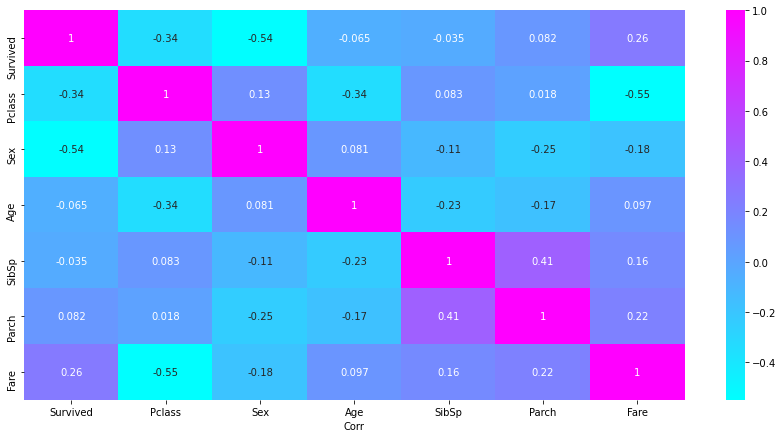

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
figure = plt.figure(figsize=(12, 6))
sns.heatmap(train.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

In [19]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,29.599282,0.447368,0.392344,35.576535
std,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch","Fare","Age"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)



In [22]:
sample_subm=pd.read_csv("gender_submission.csv")


In [23]:
sample_subm.Survived=predictions

In [24]:
sample_subm.to_csv("FinalPrediction.csv",index=False)

In [25]:
sample_subm

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
